In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.9
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.9_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.9_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	4690037.5945

Best Fitness:	2374922.1959
Solution:	100.0000
Diff:		2374822.1959

[0:36:12][----------] 1.96% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	3834629.8079

Best Fitness:	1965120.5982
Solution:	100.0000
Diff:		1965020.5982

[1:07:36][----------] 3.92% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	7175617.3262

Best Fitness:	4180455.2510
Solution:	100.0000
Diff:		4180355.2510

[1:38:40][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6714272.5486

Best Fitness:	3514799.3429
Solution:	100.0000
Diff:		3514699.3429

[2:08:36][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	3722799.3925

Best Fitness:	1890572.9289
Solution:	100.0000
Diff:		1890472.9289

[2:37:13][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	8017312.9171

Best Fitness:	2965873.8740
Solution:	100.0000
Diff:		2965773.8740

[3:03:00][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	4578414.7644

Best Fitness:	2253171.8783
Solution:	100.0000
Diff:		2253071.8783

[3:27:44][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	8950896.4000

Best Fitness:	4288796.5719
Solution:	100.0000
Diff:		4288696.5719

[3:51:40][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6394608.0600

Best Fitness:	2751520.7096
Solution:	100.0000
Diff:		2751420.7096

[4:15:20][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	4554134.0790

Best Fitness:	1865376.2319
Solution:	100.0000
Diff:		1865276.2319

[4:39:00][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	8678276.3889

Best Fitness:	2416025.6085
Solution:	100.0000
Diff:		2415925.6085

[5:01:42][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	9197441.6997

Best Fitness:	4307852.7047
Solution:	100.0000
Diff:		4307752.7047

[5:21:22][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	10477622.5889

Best Fitness:	5711357.4463
Solution:	100.0000
Diff:		5711257.4463

[5:38:56][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	5508073.5169

Best Fitness:	2738978.9614
Solution:	100.0000
Diff:		2738878.9614

[5:56:17][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	8527605.7383

Best Fitness:	4193939.3066
Solution:	100.0000
Diff:		4193839.3066

[6:12:08][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	11463982.1334

Best Fitness:	5053002.3110
Solution:	100.0000
Diff:		5052902.3110

[6:27:26][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	9758734.3487

Best Fitness:	4409412.0578
Solution:	100.0000
Diff:		4409312.0578

[6:41:03][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	3989022.1635

Best Fitness:	1163743.9262
Solution:	100.0000
Diff:		1163643.9262

[6:53:19][####------] 35.29% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6331693.8437

Best Fitness:	3151626.6484
Solution:	100.0000
Diff:		3151526.6484

[7:04:31][####------] 37.25% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	5140469.4717

Best Fitness:	2235988.2655
Solution:	100.0000
Diff:		2235888.2655

[7:15:38][####------] 39.22% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	7856419.4659

Best Fitness:	4060707.7490
Solution:	100.0000
Diff:		4060607.7490

[7:26:45][####------] 41.18% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6603062.0597

Best Fitness:	3805662.0502
Solution:	100.0000
Diff:		3805562.0502

[7:37:51][####------] 43.14% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	8317927.7060

Best Fitness:	3280588.9215
Solution:	100.0000
Diff:		3280488.9215

[7:48:12][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6700696.2425

Best Fitness:	3388659.0230
Solution:	100.0000
Diff:		3388559.0230

[7:57:55][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	8524777.1958

Best Fitness:	3316562.2334
Solution:	100.0000
Diff:		3316462.2334

[8:07:33][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6173226.8799

Best Fitness:	2850253.9871
Solution:	100.0000
Diff:		2850153.9871

[8:17:12][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	4582095.0152

Best Fitness:	2499805.7048
Solution:	100.0000
Diff:		2499705.7048

[8:26:52][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	3856691.3493

Best Fitness:	1702382.7420
Solution:	100.0000
Diff:		1702282.7420

[8:36:30][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6240946.8693

Best Fitness:	2850426.0431
Solution:	100.0000
Diff:		2850326.0431

[8:45:16][######----] 56.86% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6303989.7227

Best Fitness:	2974057.0573
Solution:	100.0000
Diff:		2973957.0573

[8:53:57][######----] 58.82% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	7897104.0639

Best Fitness:	3487216.2268
Solution:	100.0000
Diff:		3487116.2268

[9:02:34][######----] 60.78% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	4946851.7891

Best Fitness:	2121634.2775
Solution:	100.0000
Diff:		2121534.2775

[9:11:15][######----] 62.75% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	9052548.9267

Best Fitness:	3715112.1407
Solution:	100.0000
Diff:		3715012.1407

[9:19:58][######----] 64.71% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	4123524.5349

Best Fitness:	1611792.0207
Solution:	100.0000
Diff:		1611692.0207

[9:29:15][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	7416317.1429

Best Fitness:	3084300.4844
Solution:	100.0000
Diff:		3084200.4844

[9:37:53][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6208651.5393

Best Fitness:	2884765.5177
Solution:	100.0000
Diff:		2884665.5177

[9:46:29][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6724779.2980

Best Fitness:	2902957.9542
Solution:	100.0000
Diff:		2902857.9542

[9:54:53][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	8320188.1610

Best Fitness:	3802163.7330
Solution:	100.0000
Diff:		3802063.7330

[10:03:32][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	3681153.1972

Best Fitness:	1639903.6073
Solution:	100.0000
Diff:		1639803.6073

[10:11:59][########--] 76.47% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	4238268.7950

Best Fitness:	2110310.1271
Solution:	100.0000
Diff:		2110210.1271

[10:20:09][########--] 78.43% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	7285042.2806

Best Fitness:	3733449.0387
Solution:	100.0000
Diff:		3733349.0387

[10:27:49][########--] 80.39% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6784575.4535

Best Fitness:	3135103.5413
Solution:	100.0000
Diff:		3135003.5413

[10:35:27][########--] 82.35% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	5912552.6237

Best Fitness:	2569928.9312
Solution:	100.0000
Diff:		2569828.9312

[10:43:00][########--] 84.31% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	5850288.9375

Best Fitness:	3209317.9322
Solution:	100.0000
Diff:		3209217.9322

[10:50:33][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	7526110.6889

Best Fitness:	2550895.9884
Solution:	100.0000
Diff:		2550795.9884

[10:58:05][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	7842078.3344

Best Fitness:	3083649.5900
Solution:	100.0000
Diff:		3083549.5900

[11:05:13][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	9991476.8020

Best Fitness:	3769680.7572
Solution:	100.0000
Diff:		3769580.7572

[11:12:25][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	4819775.2880

Best Fitness:	2230561.9351
Solution:	100.0000
Diff:		2230461.9351

[11:19:31][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	5183814.5953

Best Fitness:	2581489.0870
Solution:	100.0000
Diff:		2581389.0870

[11:26:38][##########] 96.08% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	3470944.8596

Best Fitness:	1831836.6704
Solution:	100.0000
Diff:		1831736.6704

[11:33:47][##########] 98.04% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	6787684.7131

Best Fitness:	2604516.6577
Solution:	100.0000
Diff:		2604416.6577

[11:41:12][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

11:41:12

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
891,6.083810e+06,8.095770e+06,4.137354e+06,4.881086e+06,5.249978e+06,6.041046e+06,5.554314e+06,9.167859e+06,5.969656e+06,6.292624e+06,...,8.884233e+06,6.789368e+06,6.864008e+06,1.013279e+07,6.413172e+06,8.151931e+06,5.213797e+06,5.992676e+06,8.076162e+06,50
892,6.083810e+06,8.095770e+06,4.137354e+06,4.881086e+06,5.249978e+06,6.041046e+06,5.554314e+06,9.167859e+06,5.969656e+06,6.292624e+06,...,8.884233e+06,6.789368e+06,6.864008e+06,1.013279e+07,6.413172e+06,8.151931e+06,5.213797e+06,5.992676e+06,8.076162e+06,50
893,6.083810e+06,8.095770e+06,4.137354e+06,4.881086e+06,5.249978e+06,6.041046e+06,5.554314e+06,9.167859e+06,5.969656e+06,6.292624e+06,...,8.884233e+06,6.789368e+06,6.864008e+06,1.013279e+07,6.413172e+06,7.154708e+06,5.213797e+06,5.992676e+06,8.076162e+06,50
894,6.083810e+06,8.095770e+06,4.137354e+06,4.881086e+06,5.249978e+06,6.041046e+06,5.554314e+06,9.167859e+06,5.969656e+06,6.292624e+06,...,8.884233e+06,6.789368e+06,6.864008e+06,9.106586e+06,6.413172e+06,7.154708e+06,5.213797e+06,5.992676e+06,8.076162e+06,50
895,6.083810e+06,8.095770e+06,4.137354e+06,4.881086e+06,5.249978e+06,6.041046e+06,5.554314e+06,9.167859e+06,5.969656e+06,6.292624e+06,...,8.884233e+06,6.789368e+06,6.864008e+06,9.106586e+06,6.413172e+06,7.154708e+06,5.213797e+06,5.992676e+06,7.114636e+06,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 2374822.1958650732

Best error for run 1: 1965020.5982271917

Best error for run 2: 4180355.2509959745

Best error for run 3: 3514699.3429337633

Best error for run 4: 1890472.9289191423

Best error for run 5: 2965773.873994555

Best error for run 6: 2253071.878344525

Best error for run 7: 4288696.57189163

Best error for run 8: 2751420.7095533414

Best error for run 9: 1865276.2319317271

Best error for run 10: 2415925.6085277167

Best error for run 11: 4307752.704675102

Best error for run 12: 5711257.4462637305

Best error for run 13: 2738878.961417285

Best error for run 14: 4193839.306589005

Best error for run 15: 5052902.311010286

Best error for run 16: 4409312.05780576

Best error for run 17: 1163643.926209747

Best error for run 18: 3151526.64842424

Best error for run 19: 2235888.2654912067

Best error for run 20: 4060607.749018242

Best error for run 21: 3805562.0501809884

Best error for run 22: 3280488.9215321303

Best error for run 23: 3388559.022977342

Best error for run 24: 3316462.2333765165

Best error for run 25: 2850153.9870683486

Best error for run 26: 2499705.7048190464

Best error for run 27: 1702282.741999029

Best error for run 28: 2850326.0430714265

Best error for run 29: 2973957.05728729

Best error for run 30: 3487116.2267774646

Best error for run 31: 2121534.2774654566

Best error for run 32: 3715012.1407078854

Best error for run 33: 1611692.0206754166

Best error for run 34: 3084200.4843587354

Best error for run 35: 2884665.51773113

Best error for run 36: 2902857.954236399

Best error for run 37: 3802063.7329804525

Best error for run 38: 1639803.6073245613

Best error for run 39: 2110210.127146286

Best error for run 40: 3733349.038694175

Best error for run 41: 3135003.5412808144

Best error for run 42: 2569828.931236554

Best error for run 43: 3209217.9322399287

Best error for run 44: 2550795.988431192

Best error for run 45: 3083549.590033576

Best error for run 46: 3769580.757176831

Best error for run 47: 2230461.935093358

Best error for run 48: 2581389.086966493

Best error for run 49: 1831736.6703563703

Best error for run 50: 2604416.657719915

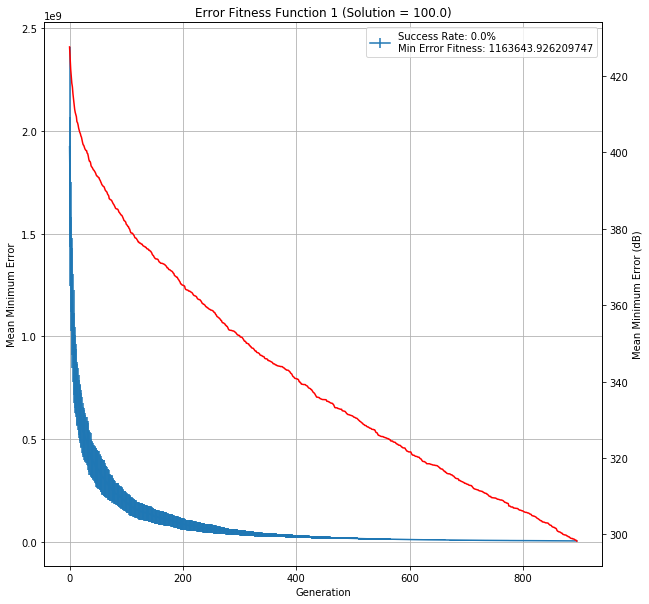

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.9_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.9,2.374822e+06,1.965021e+06,4.180355e+06,3.514699e+06,1.890473e+06,2.965774e+06,...,2.550796e+06,3.083550e+06,3.769581e+06,2.230462e+06,2.581389e+06,1.831737e+06,2.604417e+06,2.996414e+06,11:41:12,269400
